# **Loading the Dataset**

In [ ]:
# OPTIONAL. PLEASE, ONLY RUN IF "INSTALL" AND/OR "LIBRARY" FAILS
#Switch to a Python Runtime and run this code to ensure tensorflow and keras are installed correctly.
!pip install tensorflow
!pip install keras

# **If you already have them installed, please switch to a T4 GPU R Runtime proceed to the other cells**

In [16]:
install.packages("reticulate")
install.packages("tensorflow")
install.packages("keras3")
install.packages("gridExtra")
library(gridExtra)
library(grid)
library(tensorflow)
library(keras3)
library(reticulate)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
#Load data
mnist <- dataset_fashion_mnist()
train_images <- mnist$train$x / 255
train_labels <- mnist$train$y
test_images <- mnist$test$x / 255
test_labels <- mnist$test$y

# **Preprocessing the Data**

Here is an interpretation of what I did above and below:
1. Reshape Images: Convert the 2D images (28x28 pixels) into a 4D tensor format (number_of_images, height, width, channels) to make them suitable for the CNN. Since the images are grayscale, the number of channels is 1.
2. Normalize Pixel Values: Scale the pixel values from the range [0, 255] to [0, 1] by dividing by 255. This helps the model learn faster and improves accuracy.

In [18]:
# Reshape images
train_images <- array_reshape(train_images, c(nrow(train_images), 28, 28, 1))
test_images <- array_reshape(test_images, c(nrow(test_images), 28, 28, 1))

# **Building the CNN Model**

Below is an explanation of the layers and the output

1.   Conv2D (32 filters): Detects basic patterns like edges using 32 filters.
2.   MaxPooling2D (2x2): Reduces the size of the feature map to focus on key information.
3. Conv2D (64 filters): Captures more complex patterns with 64 filters.
4. MaxPooling2D (2x2): Further reduces the feature map size for efficiency.
5. Flatten: Converts the 2D feature map into a 1D vector for classification.
6. Dense (128 units): Fully connected layer for learning abstract representations.
7. Output Layer: Dense with 10 neurons for classification (not part of the 6 main layers)

In [19]:
model <- keras_model_sequential()

# Add layers to the model using the add() method
model$add(layer_conv_2d(filters = 32, kernel_size = c(3, 3), activation = 'relu', input_shape = c(28, 28, 1)))
model$add(layer_max_pooling_2d(pool_size = c(2, 2)))
model$add(layer_conv_2d(filters = 64, kernel_size = c(3, 3), activation = 'relu'))
model$add(layer_max_pooling_2d(pool_size = c(2, 2)))
model$add(layer_flatten())
model$add(layer_dense(units = 128, activation = 'relu'))
model$add(layer_dense(units = 10, activation = 'softmax'))

# **Compiling the Model**

Compiling the model comprises of:
1. Optimizer: Defines how the model updates its weights during training (e.g., Adam for efficient gradient updates).
2. Loss Function: Measures the error between predicted and actual values (e.g., sparse_categorical_crossentropy for multi-class classification).
3. Metrics: Defines performance metrics to track (e.g., accuracy to monitor how well the model is classifying).

In [20]:
model %>% compile(
  optimizer = 'adam',
  loss = 'sparse_categorical_crossentropy',
  metrics = c('accuracy')
)

# **Make and Show Predictions**

1. First Image (Top)

* Predicted: 9: The model predicted the image as class 9, which represents an "Ankle Boot" in the Fashion MNIST dataset.
* True: 9: The true label for this image is class 9, which represents "Ankle Boot."
* Observation: The prediction was correct

2. Second Image (Bottom)

* Predicted: 2: The model predicted the image as class 2, which represents "Pullover."
* True: 2: The true label for this image is class 2, which represents a "Pullover."
* Observation: The model also made a correct prediction here

3. Key Insights:
The CNN was fully accurate on these two test images, as both predictions were correct.

In [21]:
# Train the model
model %>% fit(train_images, train_labels, epochs = 10, batch_size = 64)

In [22]:
# Make predictions
predictions <- model %>% predict(test_images[1:2,,,,drop=FALSE])

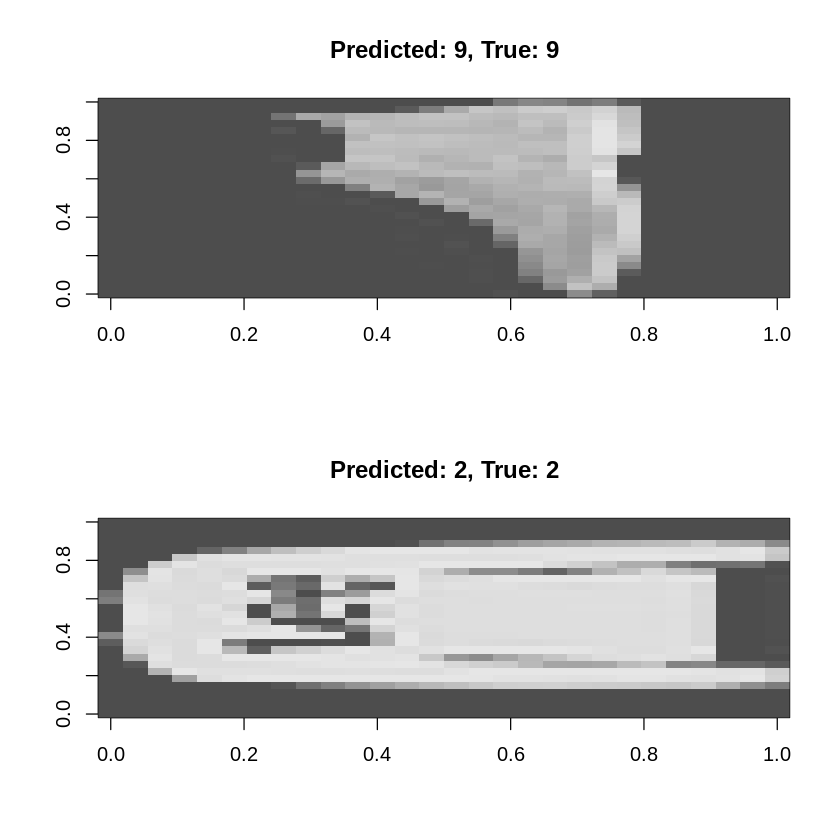

In [23]:
# Plot the images along with predictions
par(mfrow=c(2, 1))
for (i in 1:2) {
  image(as.matrix(test_images[i,,,1]), col = gray.colors(256),
        main = paste0("Predicted: ", which.max(predictions[i,]) - 1, ", True: ", test_labels[i]))
}